In [1]:
import numpy as np
import scipy
import robust_mean_estimate as rl
import importlib as il
from scipy import special
from numpy import linalg as LA
import matplotlib.pyplot as plt
%matplotlib inline
import mpld3
mpld3.enable_notebook()

fsize = 20
fpad = 10
figsize = (8,4)
fontname = 'serif'

In [2]:
"loss vs sample complexity -- dense biased"

il.reload(rl)

trials_rsm2 = 10

d_rsm2, k_rsm2, eps_rsm2 = 10, 4, 0.1
xs_rsm2 = list(np.arange(20, 420, 20))

keys_rsm2 = [rl.Oracle, rl.RME, rl.Top_K, rl.Topk_GD, rl.GDAlgs]

model_rsm2 = rl.LognormalModel()
noise_model_rsm2 = rl.DenseNoise(-2)
model_params_rsm2 = rl.Params(d=d_rsm2, k=k_rsm2, eps=eps_rsm2, mu = [10, -5, -2, 1], var = 1)
m_bounds_rsm2 = (1,1)
ylims_rsm2 = (0,1)

inputfilename_rsm2 = 'data/constant-loss-vs-m-lognormal.pkl'
plot_m_loss_rsm2 = rl.load_data(model_rsm2, noise_model_rsm2, model_params_rsm2, rl.err, keys_rsm2)
plot_m_loss_rsm2.setdata_tofile(inputfilename_rsm2, 'm', m_bounds_rsm2, trials_rsm2, ylims_rsm2, explicit_xs = True, xs = xs_rsm2)

[-2.  0.  0.  1.  0.  0.  0. 10. -5.  0.]
[[-2.07021423e+00  5.33656056e+00  1.53229186e+01  2.01922317e+00
   7.81320612e+00  7.62070248e-02  8.85131377e-01  1.25434801e+01
   2.18995614e+00  2.03855122e+00]
 [ 2.09317289e+01  2.08550688e+00  6.14367922e-01  1.70164171e+01
   1.47149548e+00  3.70662343e-01 -3.27376893e-01  1.02999578e+01
  -3.34693515e+00  2.90516951e-02]
 [-2.29005189e+00  6.94349202e+00 -6.80296705e-01  3.09974737e+00
   9.87527120e+00  1.34806921e+00  5.83526531e-01  1.70017124e+01
  -1.62052919e+00  5.34754017e+00]
 [-1.95044664e-01  1.41072842e+00  5.26708244e+00  4.28018784e+00
   2.21111794e-02  7.47461764e+00  4.91367050e+00  1.26881294e+01
  -1.59192346e+00  2.51836624e-01]
 [ 2.18523592e+01  9.54919390e+00  1.24427965e+01  8.84679600e+00
  -6.30772429e-01  2.53169930e+00  1.23043489e+01  9.30330743e+00
  -4.84621431e+00  6.26270983e-01]
 [ 5.58512964e+00  1.23265704e+00  2.18968213e+00  3.82011866e+00
   2.45015039e+00  4.22658322e+00  4.06441359e-02  1.0053

/Users/chenruidemac/Documents/GitHub/Robust_mean_estimation/robust_mean_estimate.py:292: RuntimeWarning: invalid value encountered in double_scalars
  f"Filtered out {l - len(idx[0])}/{l}, {bad_filtered} false ({bad_filtered / (l - len(idx[0])):0.2f} vs {self.fdr})")


ATTENTION
[[1.729865386367645],[3.5238430281167634],[4.138978513814022],[12.810811062705678]]
[0 1 3 7]
[ 3.15965421  3.84547494  2.07599372  5.06621811  1.34634602  1.90450568
  1.5139973  12.0566456  -1.11065523  1.91043293]
Time to run GD  0.00622105598449707
[ 0.  0.  1.  0. 10.  0. -2.  0.  0. -5.]
[[ 4.93106552e-01  9.07126401e+00  3.16754441e+00  1.65535911e+00
   1.10612635e+01  2.18704643e+01 -1.64427827e+00  7.81655388e+00
   6.35812981e+00 -4.55997462e+00]
 [-5.88676076e-01  5.95645484e+00  4.72028205e-01 -5.43633531e-01
   1.15840903e+01  9.86981112e-02 -1.01871290e+00  1.02741008e+00
   1.37255581e+00 -5.67103221e+00]
 [ 1.78071898e+00  3.04032761e+00  1.53029162e+00  1.86267167e+00
   9.61628867e+00  5.96308749e-01  2.67521496e+00 -4.51763418e-01
   1.46291104e+00 -3.90881427e+00]
 [-4.41331035e-01  2.48942345e+00  2.41772968e+00  1.60812123e+00
   1.23569806e+01  3.64309743e+00 -5.14230202e-01  8.29285991e+00
   1.75992183e+00 -3.42607433e+00]
 [-2.80679397e-01 -1.942833

/Users/chenruidemac/Documents/GitHub/Robust_mean_estimation/robust_mean_estimate.py:267: RuntimeWarning: divide by zero encountered in true_divide
  return 8*np.exp(-T**2/2) + 8*eps/((T**2)*np.log(d*np.log(d/eps*tau)))


ATTENTION
[[2.8005933225938717],[3.010693046189831],[12.184558343768632],[3.8643809884375298]]
[6 0 2 3]
[ 3.48807861  0.17983152 11.71963186  3.94311522  2.10377827 -3.00901631
  3.05475549  2.75248318  2.73789092  2.77750809]
Time to run GD  0.02533411979675293
[ 0.  1. 10.  0.  0. -5.  0.  0. -2.  0.]
[[ 6.50872065e-01  1.14132311e+01  1.96733324e+01  2.00830395e+00
   4.98874921e-01 -2.98624168e+00  4.36822468e-03  1.56304270e+00
  -9.76203786e-01  2.97586163e+00]
 [ 2.08582185e+00  2.66848469e+00  1.04942890e+01 -3.18541559e-01
   2.68122634e+00 -4.61636740e+00  9.93367094e+00  5.02918507e+00
  -1.64813916e+00  8.34093817e+00]
 [ 1.69348738e+00  2.40160718e+00  1.10163744e+01  3.46236192e+00
   9.39969151e-01  1.79248565e-01  3.18306930e+00  1.41820395e+01
  -8.54555950e-01  7.83667546e+00]
 [ 6.71522222e-01  1.48932410e+00  1.01212978e+01  3.61015467e+00
   1.44629054e+01 -5.28140911e+00  3.91044781e+00 -1.99595126e-01
  -1.81311939e+00  1.63296141e+00]
 [ 1.16767658e+00  2.54386

Oracle
[[ 9.97055135  9.55099881  9.04772856  9.27542158  9.24770688  9.42754319
   9.4667584   9.55196679  9.95289095  9.09638371  9.21391473  9.25477599
   8.98487923  9.00170037  9.75583207  9.0564123   9.07906346  8.85093275
   9.06536994  8.94590715]
 [ 8.9544602   9.00860038 11.09011295  9.4298685   8.7459334   9.57801285
   9.44635028  9.30436316  9.3552676   9.42131146  8.91918858  9.16057261
   9.02643821  9.00393187  9.13237034  9.05879721  9.0721348   9.37242601
   9.14807437  8.66177677]
 [10.15854877 10.37593959  9.59754942  9.45633217 10.03652876  9.65253925
   8.889521    9.37013502  9.37050929  8.55370391  9.36912091  9.54356749
   9.50913632  9.21959143  9.00708842  8.95168692  8.83926622  9.07462774
   9.16010443  8.70414145]
 [10.61846669 10.27466961  9.2314609  10.05565544  9.32137482  9.79001889
   8.88618296  9.78144129  9.91367922  9.26107328  9.2984258   9.07194203
   9.10035404  8.92813052  9.04158719  8.93613986  9.48373788  9.39027235
   8.97185468  9.0096612

AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

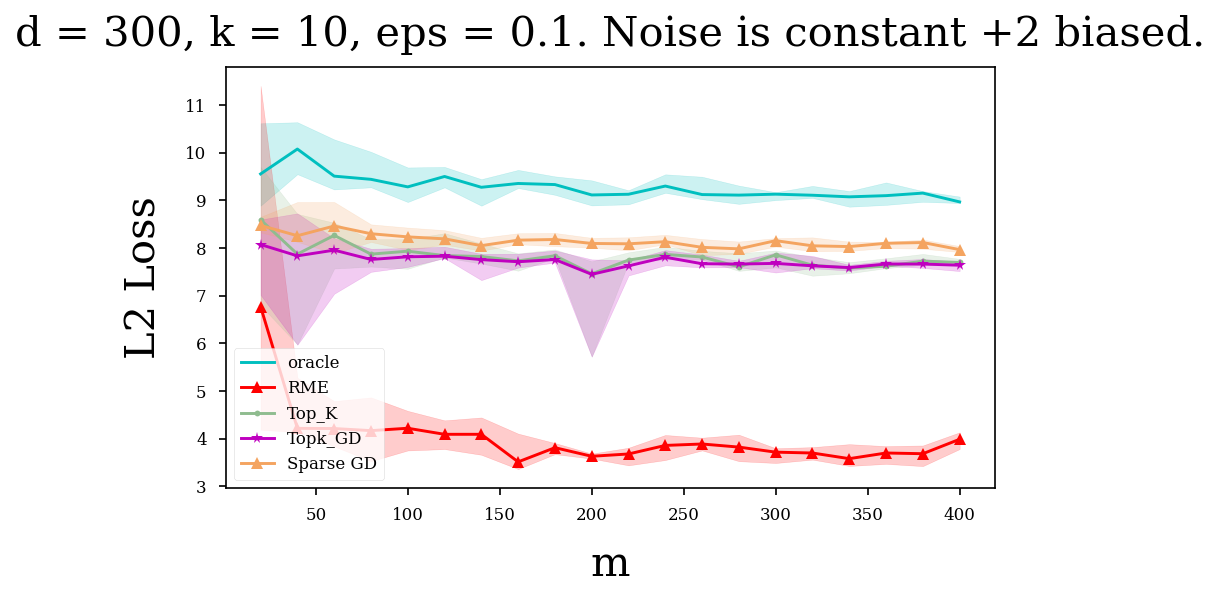

<Figure size 1200x600 with 0 Axes>

In [4]:
"loss vs sample complexity -- dense biased"

il.reload(rl)

trials_rsm2 = 10

d_rsm2, k_rsm2, eps_rsm2 = 300, 10, 0.1
xs_rsm2 = list(np.arange(20, 420, 20))

keys_rsm2 = [rl.Oracle, rl.RME, rl.Top_K, rl.Topk_GD, rl.GDAlgs]

model_rsm2 = rl.LognormalModel()
noise_model_rsm2 = rl.DenseNoise(-2)
model_params_rsm2 = rl.Params(d=d_rsm2, k=k_rsm2, eps=eps_rsm2, mu = [10, -5, -2, 1], var = 1)
m_bounds_rsm2 = (1,1)
ylims_rsm2 = (0,1)

outputfilename_rsm2 = 'figs/constant-loss-vs-m-lognormal.pdf'

title_rsm2 = 'd = {d}, k = {k}, eps = {eps}. Noise is constant +2 biased.'.format(d=d_rsm2,k=k_rsm2,eps=eps_rsm2)
xlabel_rsm2 = 'm'
ylabel_rsm2 = 'L2 Loss'

plot_m_loss_rsm2_plt = rl.plot_data(model_rsm2, noise_model_rsm2, model_params_rsm2, rl.err, keys_rsm2)


plot_m_loss_rsm2_plt.plotxy_fromfile(outputfilename_rsm2, inputfilename_rsm2, 'm', m_bounds_rsm2, (0, 2.4), title_rsm2, xlabel_rsm2, ylabel_rsm2, figsize = figsize, fsize = fsize, fpad = fpad, explicit_xs = True, xs = xs_rsm2, fontname = fontname)

Oracle_time
[[1.18970871e-04 1.03950500e-04 2.08139420e-04 1.54733658e-04
  2.83241272e-04 1.94072723e-04 2.96115875e-04 2.95162201e-04
  3.91960144e-04 3.13043594e-04 4.92095947e-04 4.15086746e-04
  2.36034393e-04 3.51190567e-04 2.85148621e-04 4.37021255e-04
  5.21898270e-04 3.70025635e-04 4.19855118e-04 4.53710556e-04]
 [1.57356262e-04 6.91413879e-05 8.08238983e-05 1.27077103e-04
  1.11818314e-04 1.94072723e-04 2.25067139e-04 2.32934952e-04
  3.07798386e-04 2.05039978e-04 3.09944153e-04 4.92811203e-04
  2.29835510e-04 5.40256500e-04 3.16858292e-04 5.77688217e-04
  4.75168228e-04 5.68628311e-04 6.70909882e-04 6.28948212e-04]
 [7.41481781e-05 6.77108765e-05 7.98702240e-05 1.66177750e-04
  1.22785568e-04 1.46865845e-04 1.73091888e-04 2.30073929e-04
  3.81946564e-04 3.91006470e-04 3.31163406e-04 4.92811203e-04
  2.95877457e-04 4.04119492e-04 4.28915024e-04 4.97817993e-04
  4.26054001e-04 3.46899033e-04 5.34057617e-04 6.11066818e-04]
 [5.69820404e-05 7.12871552e-05 8.41617584e-05 1.039505

AttributeError: 'XAxis' object has no attribute '_gridOnMajor'

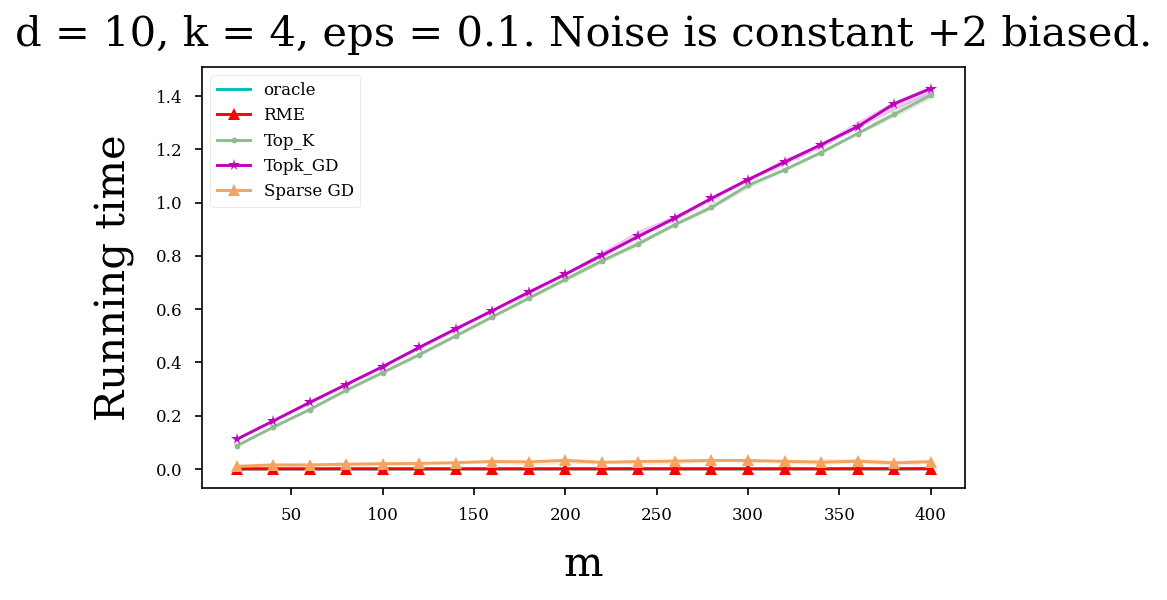

<Figure size 1200x600 with 0 Axes>

In [6]:
"loss vs sample complexity -- dense biased"

il.reload(rl)

trials_rsm2 = 10

d_rsm2, k_rsm2, eps_rsm2 = 10, 4, 0.1
xs_rsm2 = list(np.arange(20, 420, 20))

keys_rsm2 = [rl.Oracle, rl.RME, rl.Top_K, rl.Topk_GD, rl.GDAlgs]

model_rsm2 = rl.LognormalModel()
noise_model_rsm2 = rl.DenseNoise(-2)
model_params_rsm2 = rl.Params(d=d_rsm2, k=k_rsm2, eps=eps_rsm2, mu = [10, -5, -2, 1], var = 1)
m_bounds_rsm2 = (1,1)
ylims_rsm2 = (0,1)

outputfilename_rsm2 = 'figs/constant-time-vs-m-lognormal.pdf'

title_rsm2 = 'd = {d}, k = {k}, eps = {eps}. Noise is constant +2 biased.'.format(d=d_rsm2,k=k_rsm2,eps=eps_rsm2)
xlabel_rsm2 = 'm'
ylabel_rsm2 = 'Running time'

plot_m_loss_rsm2_plt = rl.plot_data(model_rsm2, noise_model_rsm2, model_params_rsm2, rl.err, keys_rsm2)

plot_m_loss_rsm2_plt.plotxy_fromfile_time(outputfilename_rsm2, inputfilename_rsm2, 'm', m_bounds_rsm2, (0, 2.4), title_rsm2, xlabel_rsm2, ylabel_rsm2, figsize = figsize, fsize = fsize, fpad = fpad, explicit_xs = True, xs = xs_rsm2, fontname = fontname)

In [ ]:
"loss vs sample complexity -- dense biased"

il.reload(rl)

trials_rsm_tmp = 10

d_rsm_tmp, k_rsm_tmp, eps_rsm_tmp = 10, 4, 0.1
xs_rsm_tmp = list(np.arange(20, 420, 20))

keys_rsm_tmp = [rl.Top_K, rl.Topk_GD]

model_rsm_tmp = rl.LognormalModel()
noise_model_rsm_tmp = rl.DenseNoise(-2)
model_params_rsm_tmp = rl.Params(d=d_rsm_tmp, k=k_rsm_tmp, eps=eps_rsm_tmp, mu = [10, -5, -2, 1], var = 0.1)
m_bounds_rsm_tmp = (1,1)
ylims_rsm_tmp = (0,1)

inputfilename_rsm_tmp = 'data/constant-loss-vs-m-topk-lognormal.pkl'
plot_m_loss_rsm_tmp = rl.load_data(model_rsm_tmp, noise_model_rsm_tmp, model_params_rsm_tmp, rl.err, keys_rsm_tmp)
plot_m_loss_rsm_tmp.setdata_tofile(inputfilename_rsm_tmp, 'm', m_bounds_rsm_tmp, trials_rsm_tmp, ylims_rsm_tmp, explicit_xs = True, xs = xs_rsm_tmp)

In [ ]:
"loss vs sample complexity -- dense biased"

il.reload(rl)

trials_rsm_tmp = 10

d_rsm_tmp, k_rsm_tmp, eps_rsm_tmp = 10, 4, 0.1
xs_rsm_tmp = list(np.arange(20, 420, 20))

keys_rsm_tmp = [rl.Top_K, rl.Topk_GD]

model_rsm_tmp = rl.LognormalModel()
noise_model_rsm_tmp = rl.DenseNoise(-2)
model_params_rsm_tmp = rl.Params(d=d_rsm_tmp, k=k_rsm_tmp, eps=eps_rsm_tmp, mu = [10, -5, -2, 1], var = 0.1)
m_bounds_rsm_tmp = (1,1)
ylims_rsm_tmp = (0,10)

outputfilename_rsm_tmp = 'figs/constant-loss-vs-m-topk-lognormal.pdf'

title_rsm_tmp = 'd = {d}, k = {k}, eps = {eps}. Noise is constant +2 biased.'.format(d=d_rsm_tmp,k=k_rsm_tmp,eps=eps_rsm_tmp)
xlabel_rsm_tmp = 'm'
ylabel_rsm_tmp = 'L2 Loss'

plot_m_loss_rsm_tmp_plt = rl.plot_data(model_rsm_tmp, noise_model_rsm_tmp, model_params_rsm_tmp, rl.err, keys_rsm_tmp)


plot_m_loss_rsm_tmp_plt.plotxy_fromfile(outputfilename_rsm_tmp, inputfilename_rsm_tmp, 'm', m_bounds_rsm_tmp, (0, 2.4), title_rsm_tmp, xlabel_rsm_tmp, ylabel_rsm_tmp, figsize = figsize, fsize = fsize, fpad = fpad, explicit_xs = True, xs = xs_rsm_tmp, fontname = fontname)